# Network Rail Analysis

This notebook presents a network rail dataset. The values are delays in minutes per 100 kilometers in five regions. The data is in the periodic form. Each year consists of 13 periods.

There are two measures using which the delays are presented in the data:
 1. The Consistent Region Measure (CRM) presents a delay attributed to Network rail per 100 kilometers. Smaller the value, better the period performance is.

 2. The Moving Annual Average (MAA) delay atttributed to Network rail per 100 kilometers during last 12 months.

The dataset was last updated in 16th September 2021 which ensures that data is considerably new to make valid conclusions.

## Importing libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as svz

## Importing the dataset

In [62]:
df = pd.read_csv('C:/Users/dania/Desktop/Railway analysis/consistent-region-measure-passenger-performance-by-region-periodic.csv')

## Exploring the dataset

In [63]:
df.head(20)

,CRM-P (periodic) Financial Period,Eastern,North West & Central,Scotland's Railway,Southern,Wales & Western,CRM-P (MAA) Financial Period,Eastern.1,North West & Central.1,Scotland's Railway.1,Southern.1,Wales & Western.1
0,2014-15 Period 01,1.06,1.05,0.52,1.87,1.39,2014-15 Period 01,NaN,NaN,NaN,NaN,NaN
1,2014-15 Period 02,1.19,1.64,0.58,1.84,1.32,2014-15 Period 02,NaN,NaN,NaN,NaN,NaN
2,2014-15 Period 03,1.24,1.28,0.76,1.74,1.55,2014-15 Period 03,NaN,NaN,NaN,NaN,NaN
3,2014-15 Period 04,1.38,1.18,0.76,1.81,1.80,2014-15 Period 04,NaN,NaN,NaN,NaN,NaN
4,2014-15 Period 05,1.49,1.48,1.13,2.03,1.71,2014-15 Period 05,NaN,NaN,NaN,NaN,NaN
5,2014-15 Period 06,1.23,1.52,0.66,1.45,0.97,2014-15 Period 06,NaN,NaN,NaN,NaN,NaN
6,2014-15 Period 07,1.22,1.42,0.99,2.18,1.83,2014-15 Period 07,NaN,NaN,NaN,NaN,NaN
7,2014-15 Period 08,1.85,2.19,1.69,3.07,1.94,2014-15 Period 08,NaN,NaN,NaN,NaN,NaN
8,2014-15 Period 09,1.71,1.97,1.15,2.64,1.89,2014-15 Period 09,NaN,NaN,NaN,NaN,NaN
9,2014-15 Period 10,1.49,1.62,1.42,2.39,1.73,2014-15 Period 10,NaN,NaN,NaN,NaN,NaN


In [64]:
df.shape

(95, 12)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CRM-P (periodic) Financial Period  95 non-null     object 
 1   Eastern                            95 non-null     float64
 2   North West & Central               95 non-null     float64
 3   Scotland's Railway                 95 non-null     float64
 4   Southern                           95 non-null     float64
 5   Wales & Western                    95 non-null     float64
 6   CRM-P (MAA) Financial Period       95 non-null     object 
 7   Eastern.1                          83 non-null     float64
 8   North West & Central.1             83 non-null     float64
 9   Scotland's Railway.1               83 non-null     float64
 10  Southern.1                         83 non-null     float64
 11  Wales & Western.1                  83 non-null     float64
d

In [66]:
df.isnull().sum()

CRM-P (periodic) Financial Period     0
Eastern                               0
North West & Central                  0
Scotland's Railway                    0
Southern                              0
Wales & Western                       0
CRM-P (MAA) Financial Period          0
Eastern.1                            12
North West & Central.1               12
Scotland's Railway.1                 12
Southern.1                           12
Wales & Western.1                    12
dtype: int64

From above inspection of the dataset few things are noted:

 - First column shows the CRM perdiod
 - The next five columns shows the five regions
 - The next column shows the MAA period
 - The last five columns shows the MAA values of each of five regions
 - There are no MAA values for first year. The reason for that is because the data started from 2014 and MAA requires past 12 months of data before it can give an annual average. Therefore, there are N/A values that cannot be added to fill the space in the last five columns.

In [67]:
df.describe()

,Eastern,North West & Central,Scotland's Railway,Southern,Wales & Western,Eastern.1,North West & Central.1,Scotland's Railway.1,Southern.1,Wales & Western.1
count,95.000000,95.000000,95.000000,95.000000,95.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,1.375474,1.608316,1.096947,2.446526,1.570947,1.407711,1.658434,1.125783,2.545904,1.599759
std,0.367139,0.498550,0.390946,0.804077,0.452066,0.166523,0.237366,0.167704,0.445117,0.251939
min,0.480000,0.740000,0.410000,0.670000,0.560000,1.000000,1.140000,0.940000,1.400000,0.960000
25%,1.135000,1.315000,0.810000,1.865000,1.295000,1.310000,1.505000,0.985000,2.260000,1.505000
50%,1.300000,1.490000,1.010000,2.450000,1.540000,1.420000,1.600000,1.090000,2.590000,1.580000
75%,1.520000,1.815000,1.315000,3.015000,1.840000,1.550000,1.930000,1.230000,2.890000,1.785000
max,2.380000,3.180000,2.240000,5.920000,2.770000,1.690000,2.040000,1.560000,3.160000,2.060000


The above table shows the statsitical analysis for numerical columns which are five regions repeated twice.

 - There are 13 financial periods in each year except for the last year which has only four periods giving total 95 periods for CRM.
 - The total values for MAA is one year less giving total of 83 values.
 - Clearly the mean delay for Southern rail is highest which is 2.45 minutes. This is also noticed in the maximum values comparison where maximum delay out of all regions is of 5.92 in Southern region.
 - In contrast, the Scotland Railway shows the lowest mean delay of 1.097 which considerably lower than all the other means.
 - In the Southern region, most of the delays were in early years because most of the data is before 75th percentile in Southern region.
 - Similarly, North West & Central had its most of the delays in early years.

In [10]:
railway_report = svz.analyze(df)
railway_report.show_html('Railway data report')

                                             |                                             | [  0%]   00:00 ->…

Report Railway data report was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Sweetviz is a new automatic EDA library package which can show number of different information in the form of HTML page. I use it to get a general view of the data and its associations and variations before moving further with the analysis. It helps me get a clearer picure of what charecterizations are in the data and how to do the remaining analysis.

## Data Cleaning

As it is clear by now that there are two different measures in the dataset. It is better to divide them both into seperate dataframes to make things easier to analyse. There will be two dataframe.
 - CRM: It shows all the consistent region measure per financial period
 - MAA: It shows the annual average of CRM starting 12 months later for all years

In [68]:
crm = df.iloc[:,0:6]

In [69]:
crm.columns = ['CRM Period', 'Eastern', 'North West & Central', 'Scotland Railway', 'Southern', 'Wales & Western']

Fixed column names of CRM dataset

In [70]:
crm

,CRM Period,Eastern,North West & Central,Scotland Railway,Southern,Wales & Western
0,2014-15 Period 01,1.06,1.05,0.52,1.87,1.39
1,2014-15 Period 02,1.19,1.64,0.58,1.84,1.32
2,2014-15 Period 03,1.24,1.28,0.76,1.74,1.55
3,2014-15 Period 04,1.38,1.18,0.76,1.81,1.80
4,2014-15 Period 05,1.49,1.48,1.13,2.03,1.71
...,...,...,...,...,...,...
90,2020-21 Period 13,0.83,0.96,0.46,1.20,1.03
91,2021-22 Period 01,0.86,1.01,0.83,1.08,0.95
92,2021-22 Period 02,1.00,1.34,0.95,1.36,1.35
93,2021-22 Period 03,1.13,1.34,0.84,2.12,1.68


Sliced CRM dataframe

In [71]:
maa = df.iloc[:,6:]

In [72]:
maa.columns = ['MAA Period', 'Eastern', 'North West & Central', 'Scotland Railway', 'Southern', 'Wales & Western']

Fixed the column names for MAA dataset

Removing first 12 months from MAA dataframe as they are unnecessary

In [73]:
maa = maa[12:]

In [74]:
maa

,MAA Period,Eastern,North West & Central,Scotland Railway,Southern,Wales & Western
12,2014-15 Period 13,1.33,1.52,0.97,2.19,1.53
13,2015-16 Period 01,1.33,1.56,0.98,2.20,1.55
14,2015-16 Period 02,1.33,1.54,0.98,2.21,1.56
15,2015-16 Period 03,1.31,1.55,0.98,2.21,1.56
16,2015-16 Period 04,1.31,1.57,0.99,2.25,1.55
...,...,...,...,...,...,...
90,2020-21 Period 13,1.00,1.14,0.96,1.40,0.96
91,2021-22 Period 01,1.02,1.16,0.98,1.42,0.98
92,2021-22 Period 02,1.03,1.19,1.00,1.45,1.02
93,2021-22 Period 03,1.06,1.23,1.01,1.55,1.09


Sliced MAA dataframe

Converting dataset into Logrithm scale to stabilize variance of series

==========================================================================================================

In [55]:
col_names = list(crm.columns)

In [56]:
col_names.pop(0)

'CRM Period'

In [57]:
col_names

['Eastern',
 'North West & Central',
 'Scotland Railway',
 'Southern',
 'Wales & Western']

In [59]:
for i in col_names:
    crm[i] = np.log(crm[i])

In [60]:
crm

,CRM Period,Eastern,North West & Central,Scotland Railway,Southern,Wales & Western
0,2014-15 01,0.058269,0.048790,-0.653926,0.625938,0.329304
1,2014-15 02,0.173953,0.494696,-0.544727,0.609766,0.277632
2,2014-15 03,0.215111,0.246860,-0.274437,0.553885,0.438255
3,2014-15 04,0.322083,0.165514,-0.274437,0.593327,0.587787
4,2014-15 05,0.398776,0.392042,0.122218,0.708036,0.536493
...,...,...,...,...,...,...
90,2020-21 13,-0.186330,-0.040822,-0.776529,0.182322,0.029559
91,2021-22 01,-0.150823,0.009950,-0.186330,0.076961,-0.051293
92,2021-22 02,0.000000,0.292670,-0.051293,0.307485,0.300105
93,2021-22 03,0.122218,0.292670,-0.174353,0.751416,0.518794


In [ ]:
test_crm = crm

In [ ]:
test_crm['CRM Period'] = test_crm['CRM Period'].str.replace(r'Period', '')

==========================================================================================================

## Visualization (continue here!!!!)

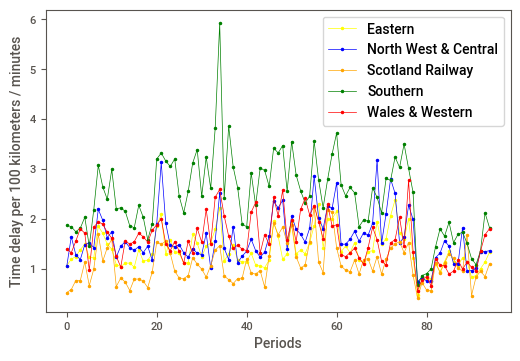

In [18]:
fig, ax = plt.subplots()
ax.plot(crm['Eastern'], marker='.', linestyle='-', linewidth = 0.5, label='Eastern', color='Yellow')
ax.plot(crm['North West & Central'], marker='.', linestyle='-', linewidth = 0.5, label='North West & Central', color='blue')
ax.plot(crm['Scotland Railway'], marker='.', linestyle='-', linewidth = 0.5, label='Scotland Railway', color='Orange')
ax.plot(crm['Southern'], marker='.', linestyle='-', linewidth = 0.5, label='Southern', color='Green')
ax.plot(crm['Wales & Western'], marker='.', linestyle='-', linewidth = 0.5, label='Wales & Western', color='Red')
ax.set_ylabel('Time delay per 100 kilometers / minutes')
ax.set_xlabel('Periods')
ax.legend()

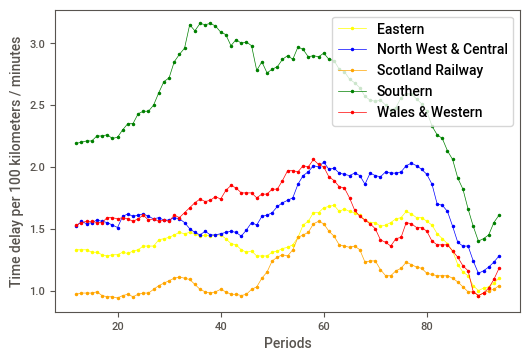

In [19]:
fig, ax = plt.subplots()
ax.plot(maa['Eastern'], marker='.', linestyle='-', linewidth = 0.5, label='Eastern', color='Yellow')
ax.plot(maa['North West & Central'], marker='.', linestyle='-', linewidth = 0.5, label='North West & Central', color='blue')
ax.plot(maa['Scotland Railway'], marker='.', linestyle='-', linewidth = 0.5, label='Scotland Railway', color='Orange')
ax.plot(maa['Southern'], marker='.', linestyle='-', linewidth = 0.5, label='Southern', color='Green')
ax.plot(maa['Wales & Western'], marker='.', linestyle='-', linewidth = 0.5, label='Wales & Western', color='Red')
ax.set_ylabel('Time delay per 100 kilometers / minutes')
ax.set_xlabel('Periods')
ax.legend()

## Machine Learning

In [78]:
from statsmodels.tsa.arima_model import ARIMA

In [79]:
model = ARIMA(crm['Eastern'], order=(2,1,2))

C:\Users\dania\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


C:\Users\dania\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


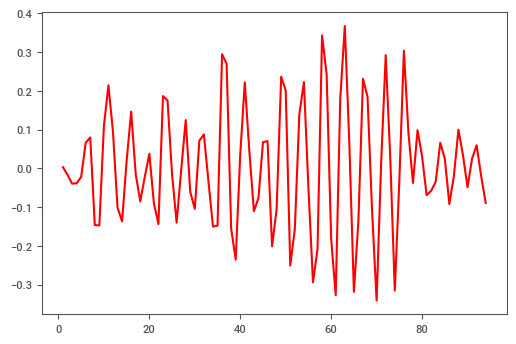

In [82]:
results = model.fit(disp=-1)
plt.plot(results.fittedvalues, color='red')